Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.
● Build data profiles and tables - Inferential statistics
● Explore data relationships - Data visualization
● Feature Selection and Engineering

# Initial questions about the data.

1. How does price differ based on school control (public, private nonprofit, private for-profit)?
2. Does size (student enrollment and number of faculty) vary by control?
3. What factors contribute to schools closing? What is the distribution of closed schools (by region, size, control)
4. How does student debt relate to school size and control? Does student debt contribute to schools closing?

In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the preprocessed data
filename = "./data/processed/college.filtered.csv"
data = pd.read_csv(filename, dtype={'OPEID':object, 'Zip':object}, index_col=0)
data.head()

,Id,OPEID,Name,City,Zip,Predominant degree,Main branch,NumBranches,Primary degree type,High degree,...,MedianDebtNotComplete,PercentReceiveFedLoan,AvgAgeEntry,PercentFemale,PercentMarried,PercentDependent,PercentVeteran,AvgFamilyIncome,MedianFamilyIncome,MedianHouseholdIncome
0,1,01230800,COMMUNITY COLLEGE OF THE AIR FORCE,MONTGOMERY,361126613,NaN,True,1,Predominantly associate's-degree granting,Associate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,00100200,ALABAMA A & M UNIVERSITY,NORMAL,35762,NaN,True,1,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,00105200,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,352940110,NaN,True,2,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,00574900,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,36360,NaN,True,1,Predominantly certificate-degree granting,Associate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,02503400,SOUTHERN CHRISTIAN UNIVERSITY,MONTGOMERY,361173553,NaN,True,1,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Build data profiles and tables
What are the columns in the data? What are the data types? How many columns contain null values?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 124698
Data columns (total 54 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Id                            124699 non-null  int64  
 1   OPEID                         124699 non-null  object 
 2   Name                          124699 non-null  object 
 3   City                          124699 non-null  object 
 4   Zip                           124699 non-null  object 
 5   Predominant degree            101334 non-null  float64
 6   Main branch                   124699 non-null  bool   
 7   NumBranches                   124699 non-null  int64  
 8   Primary degree type           124699 non-null  object 
 9   High degree                   124699 non-null  object 
 10  Control                       124676 non-null  object 
 11  StateCode                     124669 non-null  object 
 12  Region                        124669 non-nul

According to the data dictionary, columns 8-12 are categorical variables, however they have been imported as strings here. I can convert them to categories later, if I decide that will make them easier to work with.

Columns 45-53(and several others) contain relatively few values, so I suspect that they will need to be removed. More exploration of null values will follow later.

What are the ranges and distributions of the numerical variables?

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,124699.0,62350.000000,35997.644946,1.000000,31175.500000,62350.000000,93524.500000,1.246990e+05
Predominant degree,101334.0,1.971628,0.876321,1.000000,1.000000,2.000000,3.000000,3.000000e+00
NumBranches,124699.0,3.737648,12.623389,1.000000,1.000000,1.000000,2.000000,1.410000e+02
AdmissionRate,34156.0,0.696963,0.223910,0.000000,0.555600,0.721100,0.861525,1.000000e+01
ACTMidpoint,15871.0,22.722954,3.265049,2.000000,21.000000,22.000000,24.000000,3.500000e+01
SATAvg,18598.0,1052.701043,126.892749,514.000000,970.000000,1035.000000,1115.000000,1.599000e+03
Enrollment-DegreeSeeking,110343.0,2151.355673,4734.967374,0.000000,115.000000,490.000000,1989.000000,2.535940e+05
NetPrice-Private,18560.0,17982.273545,7462.132716,-103168.000000,13120.750000,18179.500000,22487.000000,8.757000e+04
AvgCost-AY,20504.0,23002.166699,11575.691881,2200.000000,13293.000000,21395.500000,29439.500000,7.447300e+04
TuitionRevenue/FTE,106055.0,13423.722616,138429.201381,0.000000,2489.000000,5759.000000,10627.000000,2.667016e+07


Check for null values, both as a count and as a percentage of the column data.

In [5]:
#Check for null values
nulldata = data.isnull().sum()
nulldata = pd.DataFrame(nulldata)
nulldata.columns = ["Count"]
nulldata['Percent'] = (data.isnull().sum())/data.shape[0]

print(nulldata.loc[nulldata['Percent']>0])

                               Count   Percent
Predominant degree             23365  0.187371
Control                           23  0.000184
StateCode                         30  0.000241
Region                            30  0.000241
AdmissionRate                  90543  0.726092
ACTMidpoint                   108828  0.872726
SATAvg                        106101  0.850857
Enrollment-DegreeSeeking       14356  0.115125
NetPrice-Private              106139  0.851162
AvgCost-AY                    104195  0.835572
TuitionRevenue/FTE             18644  0.149512
Expenditure/FTE                18650  0.149560
AvgFaculty Salary              55047  0.441439
Percent Fulltime Faculty       63748  0.511215
Completion-4yr                 89819  0.720286
Completion<4yr                 63229  0.507053
RetentionFT-4yr               101800  0.816366
RetentionFT-<4yr               87419  0.701040
RetentionPT-4yr               109322  0.876687
RetentionPT-<4yr              102212  0.819670
PercentFedLoa

As suggested above, columns 45-53 (and others) contain more than 70% missing data. In the preprocessing stage, columns with more than 90% of the missing data were excluded. This step will remove columns with more than 70% missing data.

In [6]:
# Make a list of columns with >70% missing data
to_drop = [column for column in data.columns if (data[column].isnull().sum()/len(data[column]) > 0.70)]
print("Columns to drop include: ", to_drop)
print("Number of columns to drop: ", len(to_drop))

# Drop column with >70% missing data
data = data.drop(to_drop, axis=1)
print(data.shape)

Columns to drop include:  ['AdmissionRate', 'ACTMidpoint', 'SATAvg', 'NetPrice-Private', 'AvgCost-AY', 'Completion-4yr', 'RetentionFT-4yr', 'RetentionFT-<4yr', 'RetentionPT-4yr', 'RetentionPT-<4yr', 'PercentFedLoan', 'PercentReceiveFedLoan', 'AvgAgeEntry', 'PercentFemale', 'PercentMarried', 'PercentDependent', 'PercentVeteran', 'AvgFamilyIncome', 'MedianFamilyIncome', 'MedianHouseholdIncome']
Number of columns to drop:  20
(124699, 34)


## Number and names of schools in the database
- How many rows are in the database?
- How many unique schools are in the database? By OPEID and by Name

In [7]:
n_data = data.shape[0]
print("There are ", n_data, " observations in the data")

n_opeid = data["OPEID"].nunique()
print("There are ", n_opeid, "unique OPEIDs in the data")
print(data.OPEID.value_counts())

There are  124699  observations in the data
There are  11511 unique OPEIDs in the data
00224900    37
00104700    23
00147900    23
00111700    21
00245300    21
            ..
01367402     1
02122800     1
01294000     1
00624300     1
030106A2     1
Name: OPEID, Length: 11511, dtype: int64


In [8]:
data['Name'] = data['Name'].str.lower()
n_schools = data['Name'].nunique()
print("There are ", n_schools, "unique school names in the data")
print(data.Name.value_counts())

There are  14971 unique school names in the data
itt technical institute                              672
marinello school of beauty                           212
empire beauty school                                 190
lincoln technical institute                          167
ross medical education center                        148
                                                    ... 
universal technical institute of texas inc.            1
frontier community college                             1
illinois eastern comm colls-wabash valley college      1
carsten aveda institute                                1
woodruff medical training and testing                  1
Name: Name, Length: 14971, dtype: int64


There are 11511 OPEID numbers and 14971 unique school names in the data, which means that some school names share OPEID numbers. To get a sense for the data, I think it will be important to know how schools names relate to the OPEID numbers.

First - how many school names occur only once in the database? What are those names?

In [9]:
unique_names = data.Name.value_counts(ascending = True)[data.Name.value_counts()==1]
print(unique_names)

woodruff medical training and testing                1
carsten aveda institute                              1
illinois eastern comm colls-wabash valley college    1
frontier community college                           1
universal technical institute of texas inc.          1
                                                    ..
columbine college i                                  1
northwest college-beaverton                          1
wyoming valley health care system-sch of nucl med    1
american national college                            1
cox health systems school                            1
Name: Name, Length: 2276, dtype: int64


There are 2276 school names that only occur once the database. That means that there are roughly 13000 school names that occur more than once.  How many schools occur multiple times, and how many times do they occur?

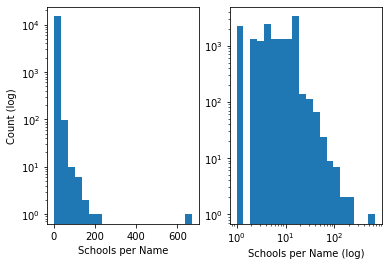

In [10]:
#Plot histogram of number of schools per Name
plt.subplot(1, 2, 1)
#plt.hist(data['Name'].value_counts())
hist, bins, _ = plt.hist(data['Name'].value_counts(), bins=20)
plt.xlabel('Schools per Name')
plt.ylabel('Count (log)')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Converted to logarithmic scale
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data['Name'].value_counts(), bins=logbins)
plt.xlabel('Schools per Name (log)')
plt.xscale('log')
plt.yscale('log')
plt.show()

There is one school with more than 600 occurences in the database, which skews the histogram and its bin sizes. Converting the number of schools (and counts) to a log scale more clearly shows the distribution of the schools by their count in the data.

While there are many unique school names, there are also equally many schools names with counts of 100 (or 200).

Now that we have a sense of how often school names are repeated in the database, we can explore the distribution of the OPEID. 

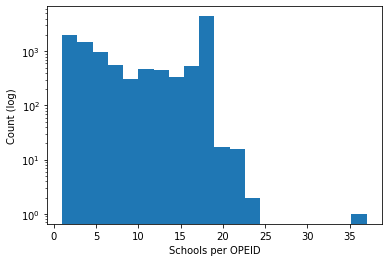

In [11]:
#Plot histogram of number of schools per OPEID
plt.hist(data['OPEID'].value_counts(), bins=20)
plt.xlabel('Schools per OPEID')
plt.ylabel('Count (log)')
plt.yscale('log')

The number of observations per OPEID are much less varied than the school names, with the max count being around 35. This must mean that schools with the same name can have multiple OPEIDs.

From the list and counts of school names (above), ITT Technical Institute occurs 672 times in the database. How many OPEIDs are associated with ITT Tech?

In [12]:
itt = data.loc[data['Name'].str.startswith('itt tech')] # TECHNICAL INSTITUTE']
print(itt.OPEID.value_counts())
print("ITT Technical Institue has 672 schools distrubted over 254 OPEIDs")

00732902    18
00732903    18
03071800    18
00732901    18
03071801    18
            ..
10732957     1
02361004     1
02321903     1
10732951     1
02291603     1
Name: OPEID, Length: 254, dtype: int64
ITT Technical Institue has 672 schools distrubted over 254 OPEIDs


The maximum number of OPEIDs associated with ITT Tech is 18. How are the schools names associated with one OPEID related?

In [13]:
itt_sample = data.loc[data.OPEID == '00732903']
itt_sample

,Id,OPEID,Name,City,Zip,Predominant degree,Main branch,NumBranches,Primary degree type,High degree,...,PercentAidedLowIncome,PercentIndependent,PercentDependentLowIncome,PercentIndepentdentLowIncome,PercentFirstGen,AvgIncomeDependent,AvgIncomeIndep,MedianDebt,MedianDebtCompleters,MedianDebtNotComplete
5701,5702,00732903,itt technical institute-houston,HOUSTON,770905818,NaN,True,4,Predominantly associate's-degree granting,Associate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12240,12241,00732903,itt technical institute,HOUSTON,770905818,NaN,True,5,Predominantly associate's-degree granting,Associate degree,...,0.635055,0.496016,0.437022,0.836269,0.551735,58425.61298,26187.55805,8574.5,12469.0,3938.5
18783,18784,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.627427,0.493280,0.437132,0.822906,0.543544,58977.57059,26614.57650,8834.0,13513.0,3928.0
25218,25219,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.617428,0.493476,0.433763,0.805949,0.555260,59465.38238,27163.26105,9329.0,14070.0,4417.0
31583,31584,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.613342,0.524248,0.434041,0.776057,0.571004,59925.51167,29234.85648,9799.0,14125.0,4417.0
38058,38059,00732903,itt technical institute,HOUSTON,770905821,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.603545,0.546107,0.430054,0.747740,0.565508,61715.74188,30800.44818,10028.5,14125.0,4417.0
44589,44590,00732903,itt technical institute,HOUSTON,77090-5821,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.605835,0.548366,0.426906,0.753200,0.574435,60736.87755,29543.46739,9792.0,18216.0,5348.0
51083,51084,00732903,itt technical institute,HOUSTON,77090-5818,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.615309,0.575167,0.434460,0.748888,0.585259,57378.32294,28381.15320,9791.0,20030.0,4886.5
57592,57593,00732903,itt technical institute,HOUSTON,77090-581,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.622331,0.612181,0.423736,0.748142,0.555018,57458.37104,28320.93152,9126.0,20624.0,4417.0
64220,64221,00732903,itt technical institute,Houston,77090-5821,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.630033,0.635318,0.413470,0.754343,0.532114,57185.20615,27828.79673,8834.0,21124.0,4417.0


All of these schools are in Houston. They may have different names - some include the name "Houston" or "Houston-North."
They also all have different IDs, which leads to some questions about how the ID number relates to the OPEID and the school name. This information may be in the data dictionary, or other meta-data documents.

## Explore categorical columns
Reprint the column names, to know what to analyze next.

In [14]:
data.columns

Index(['Id', 'OPEID', 'Name', 'City', 'Zip', 'Predominant degree',
       'Main branch', 'NumBranches', 'Primary degree type', 'High degree',
       'Control', 'StateCode', 'Region', 'Enrollment-DegreeSeeking',
       'CURROPER', 'TuitionRevenue/FTE', 'Expenditure/FTE',
       'AvgFaculty Salary', 'Percent Fulltime Faculty', 'Completion<4yr',
       'PercentAge>25', 'PercentCompleted4yr', 'PercentWithdraw4yr',
       'PercentEnrolled4yr', 'PercentAidedLowIncome', 'PercentIndependent',
       'PercentDependentLowIncome', 'PercentIndepentdentLowIncome',
       'PercentFirstGen', 'AvgIncomeDependent', 'AvgIncomeIndep', 'MedianDebt',
       'MedianDebtCompleters', 'MedianDebtNotComplete'],
      dtype='object')

### Predominant degree
What are the values (and distributions) of the "Predominant degree" column? In the preprocessing step, this column was converted to a category. It is being processed here as a float. It is unclear at this point how the original string categories were converted to numbers.

Result: After consulting with the data dictionary, this column contains data from "Primary degree type" that has been recoded to eliminate some of the values (Not classified and Entirely graduate-degree granting). Since this data is available in another column, I have decided to eliminate the "Predominant degree" column.

In [15]:
data['Predominant degree'].value_counts()
data=data.drop('Predominant degree', axis=1)

### Main branch
What are the values (and distributions) of the "Main branch" column?

Result: All of the observations in the data are coded as a "Main branch" which means it is not a meaningful variable, so I'll drop it from further analysis.

In [16]:
print(data['Main branch'].value_counts())
data= data.drop('Main branch', axis=1)

True    124699
Name: Main branch, dtype: int64


### Number of branches
Since all schools are labeled as main branches, how many other branches are associated with each school? This is in the NumBranches column.

1      91561
2      11535
3       5970
4       3286
5       2010
6       1490
8        758
7        752
9        633
11       584
10       579
23       347
14       314
141      282
78       234
13       234
74       222
22       198
19       192
31       186
26       182
86       172
28       171
16       161
38       152
12       149
17       136
15       136
128      128
42       126
20       120
119      119
99       101
93        95
18        92
44        88
84        85
85        85
39        78
72        72
68        72
71        71
70        70
63        63
60        60
59        59
27        54
54        54
51        51
50        50
21        42
41        41
40        40
36        36
34        34
33        33
30        30
24        24
Name: NumBranches, dtype: int64


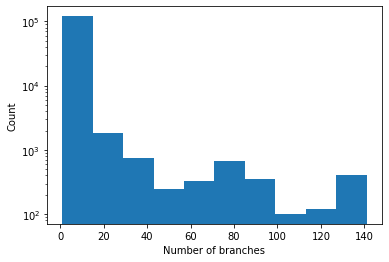

In [17]:
print(data['NumBranches'].value_counts())
plt.hist(data['NumBranches'])
plt.xlabel('Number of branches')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Most of the schools (91561) have only one branch, while a few have more than 100 branches. It will be interesting to see how the number of branches might relate to school name and OPEID, particularly for the schools with more than 100 branches.

### Primary degree type
What are the values and distribution of the 'Primary degree type' column? In the preprocessing step, they were converted to categorical data, but they have been imported here as a string. Should they be re-convereted to categorical data?

In [18]:
print(data['Primary degree type'].value_counts())
data['Primary degree type'].astype('category')

Predominantly certificate-degree granting    52605
Predominantly bachelor's-degree granting     35199
Predominantly associate's-degree granting    26670
Not classified                                5228
Entirely graduate-degree granting             4997
Name: Primary degree type, dtype: int64


0         Predominantly associate's-degree granting
1          Predominantly bachelor's-degree granting
2          Predominantly bachelor's-degree granting
3         Predominantly certificate-degree granting
4          Predominantly bachelor's-degree granting
                            ...                    
124694                               Not classified
124695                               Not classified
124696                               Not classified
124697                               Not classified
124698                               Not classified
Name: Primary degree type, Length: 124699, dtype: category
Categories (5, object): [Entirely graduate-degree granting, Not classified, Predominantly associate's-degree granting, Predominantly bachelor's-degree granting, Predominantly certificate-degree granting]

Based on the 5 different values, it does seem that this column contains categorical data, so it has been adjusted accordingly. I think I'm primarily intersted in undergraduate institutions, and may drop the 'Entirely graduate-degree granting' institutions for further analysis at a later time.

### High degree awarded
What are the values and distributions in the 'High degree' column? Again, these should be categorical variables. 
How is the highest degree offered by an institution related to the primary degree type?

In [19]:
print(data['High degree'].value_counts())
data['High degree'].astype('category')

Certificate degree     42894
Graduate degree        32252
Associate degree       30733
Bachelor's degree      13592
Non-degree-granting     5228
Name: High degree, dtype: int64


0            Associate degree
1             Graduate degree
2             Graduate degree
3            Associate degree
4             Graduate degree
                 ...         
124694    Non-degree-granting
124695    Non-degree-granting
124696    Non-degree-granting
124697    Non-degree-granting
124698    Non-degree-granting
Name: High degree, Length: 124699, dtype: category
Categories (5, object): [Associate degree, Bachelor's degree, Certificate degree, Graduate degree, Non-degree-granting]

Since there are only 5 values, it seems that this column should be treated categorically as well. Interstingly, there are 5228 non-degree-granting institutions, which is the same number as the "Not classifed" category in the 'Primary degree type' column. 

The following pivot table shows how the categories in these two columns are related. 

In [20]:
degree = data.pivot_table(index='Primary degree type', columns='High degree', aggfunc='size')
degree

High degree,Associate degree,Bachelor's degree,Certificate degree,Graduate degree,Non-degree-granting
Primary degree type,,,,,
Entirely graduate-degree granting,NaN,NaN,NaN,4997.0,NaN
Not classified,NaN,NaN,NaN,NaN,5228.0
Predominantly associate's-degree granting,22047.0,3842.0,NaN,781.0,NaN
Predominantly bachelor's-degree granting,NaN,9239.0,NaN,25960.0,NaN
Predominantly certificate-degree granting,8686.0,511.0,42894.0,514.0,NaN


Indeed, the 5228 'Non-degree granting institutions' from 'High degree" are the same as the 'Not classified' schools from 'Primary degree type'.

Not surprisingly, the highest degrees offered at each institution are at least as high as their primary degree - there is not a primarily bachelor's granting institution with the highest degree of a certificate. However, the highest degree offered by a school may be higher than it's predominant degree type. For each school type, there are several primarily certificate institutions that also award graduate degrees. 

A vast majority of the certificate granting instutitions and associates granting institutions offer a certificate and associate's degree, respectively, as their highest degree. However, 73.7% of the bachelor's granting institutions offer graduate degrees as their highest degree.

Given some of the predictability in the patterning between these two columns, it seems likely that only one of these categories will need to be kept in the final analysis. My inclination is to keep the 'Primary degree type' column, and delete the 'High degree' column.

### Control - Public, Private nonprofit for Private for-profit
What is the distribution of schools by "Control" type? Is this column treated as a string or a category?  It should be a category.

In [21]:
data["Control"] = data["Control"].astype('category')
print(data.Control.dtype)
print(data["Control"].value_counts())

school_total = 51531 + 37943 + 35202
percent_forprofit = (51531/school_total) * 100
print("For profit = ", percent_forprofit)

category
Private for-profit    51531
Public                37943
Private nonprofit     35202
Name: Control, dtype: int64
For profit =  41.33193236869967


There are approximately equal numbers of public and private non-profit schools. About 40% of the schools are private for-profit schools. It will be interesting to see how the control type interacts with the other variables like cost, size, and degree type.

### Location - State and Region

How are the schools distributed by state and region?

In [22]:
data.StateCode = data.StateCode.astype('category')
print(data.StateCode.dtype)
data.StateCode.value_counts()

category


California                        12182
New York                           8242
Pennsylvania                       7456
Texas                              7037
Florida                            5935
Ohio                               5896
Illinois                           4903
Missouri                           3612
Massachusetts                      3423
Michigan                           3404
Georgia                            3172
North Carolina                     3038
Virginia                           2907
Tennessee                          2903
New Jersey                         2721
Puerto Rico                        2587
Minnesota                          2552
Indiana                            2530
Oklahoma                           2493
Louisiana                          2464
Washington                         2157
Kentucky                           2064
Arizona                            2041
Colorado                           1926
Wisconsin                          1778


Not suprisingly, some of the largest states (CA, NY, TX) have the most schools.

The "Regions" column is defined by state groups, so I expect that I will only need to keep one of the columns, but I'm not sure which one to keep yet.

In [23]:
data.Region = data.Region.astype('category')
print(data.Region.dtype)
data['Region'].value_counts()

category


Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    29621
Mid East (DE, DC, MD, NJ, NY, PA)                             20766
Great Lakes (IL, IN, MI, OH, WI)                              18509
Far West (AK, CA, HI, NV, OR, WA)                             17111
Southwest (AZ, NM, OK, TX)                                    12497
Plains (IA, KS, MN, MO, NE, ND, SD)                           11367
New England (CT, ME, MA, NH, RI, VT)                           7630
Rocky Mountains (CO, ID, MT, UT, WY)                           4336
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                2792
U.S. Service Schools                                             40
Name: Region, dtype: int64

## Explore columns with numerical values
### Enrollment - Degree Seeking

The 'Enrollment-DegreeSeeking' column contains the number undergraduate degree-seeking students enrolled at the institution.

In [24]:
print('Null count: ', data['Enrollment-DegreeSeeking'].isnull().sum())
zero = data.loc[data['Enrollment-DegreeSeeking']==0]
print('Schools with 0 Enrollment-DegreeSeeking', zero.shape[1])
data['Enrollment-DegreeSeeking'].describe().T

Null count:  14356
Schools with 0 Enrollment-DegreeSeeking 32


count    110343.000000
mean       2151.355673
std        4734.967374
min           0.000000
25%         115.000000
50%         490.000000
75%        1989.000000
max      253594.000000
Name: Enrollment-DegreeSeeking, dtype: float64

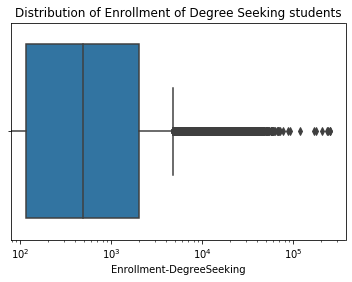

In [25]:
sns.boxplot('Enrollment-DegreeSeeking', data=data)
plt.title('Distribution of Enrollment of Degree Seeking students')
plt.xscale('log')
plt.show()

Given the wide range of enrollments and huge numbers of outliers, it might be helpful to convert enrollment into bins - small, medium, large, huge; or by number ranges.

### Tuition Revenue
The next column contains the Tuition Revenue per Full-Time equivalent student. According to the data dictionary, this is the net tuition revenue (tuition revenue minus discounts and allowances) divided by the number of FTE students (undergraduates and graduate students). Generally, a full time equivalence is 12 undergraduate credit hours or 6 graduate hours per semester.

In [26]:
print('Null count: ', data['TuitionRevenue/FTE'].isnull().sum())

zero = data.loc[data['TuitionRevenue/FTE']==0]
print('Schools with 0 TuitionRevenue/FTE', zero.shape[1])

data['TuitionRevenue/FTE'].describe()

Null count:  18644
Schools with 0 TuitionRevenue/FTE 32


count    1.060550e+05
mean     1.342372e+04
std      1.384292e+05
min      0.000000e+00
25%      2.489000e+03
50%      5.759000e+03
75%      1.062700e+04
max      2.667016e+07
Name: TuitionRevenue/FTE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


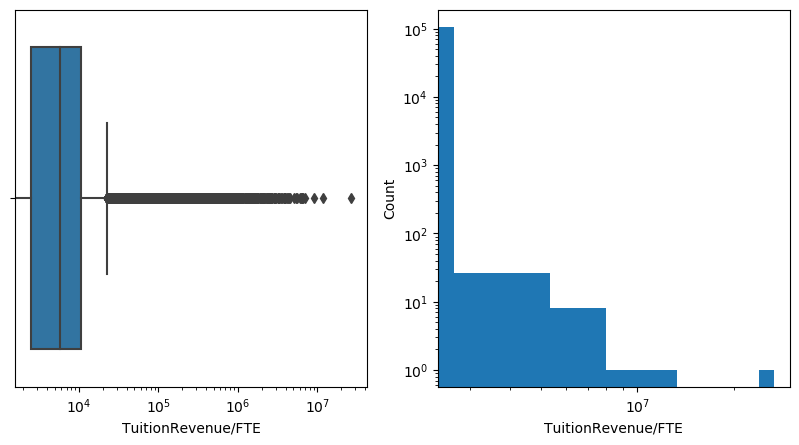

In [27]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('TuitionRevenue/FTE', data=data)
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['TuitionRevenue/FTE'])
plt.xlabel('TuitionRevenue/FTE')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

There seem to be a lot of schools with low TuitionRevenue/FTE, which warrant more exploring. As shown above, only 33 schools have 0 tuition revenue, though 18644 schools have null values. Again, it might be worth binning the Tuition Revenue column into ranges, or groups.

One school seems to have a much higher tuition than the others - Brooks College in Long Beach, CA. I'm going to drop this school for the purposes of the following exploration.

In [28]:
high_tuition_school = data['TuitionRevenue/FTE'].max()
high_tuition = data.loc[data['TuitionRevenue/FTE']==high_tuition_school]
high_tuition.head()
data.drop(high_tuition.index, inplace=True)

### Expenditure 
Next, is the Expenditure/FTE column which contains "Instructional expenditures divided by the number of FTE students (undergraduates and graduate students) (http://nces.ed.gov/ipeds/glossary/index.asp?id=854)." 

In [29]:
print('Null count: ', data['Expenditure/FTE'].isnull().sum())
zero = data.loc[data['Expenditure/FTE']==0]
print('Schools with 0 Expenditure/FTE', zero.shape[1])

data['Expenditure/FTE'].describe()

Null count:  18650
Schools with 0 Expenditure/FTE 32


count    1.060480e+05
mean     1.659054e+04
std      9.458663e+05
min      0.000000e+00
25%      2.456000e+03
50%      4.160000e+03
75%      6.739000e+03
max      2.920157e+08
Name: Expenditure/FTE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


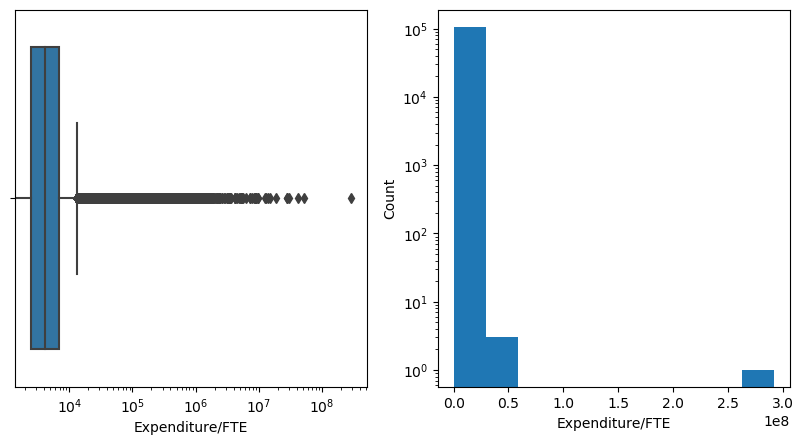

In [30]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Expenditure/FTE', data=data)
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['Expenditure/FTE'])
plt.xlabel('Expenditure/FTE')
plt.ylabel('Count')
#plt.xscale('log')
plt.yscale('log')
plt.show()

What is the school with the max value?  It seems to be way higher than even the other high values.

In [31]:
max_expend = data['Expenditure/FTE'].max()
max_expenditure_school = data.loc[data['Expenditure/FTE']== max_expend]
print(max_expenditure_school)
data.drop(max_expenditure_school.index, inplace=True)

          Id     OPEID                         Name              City    Zip  \
76720  76721  00659100  st joseph school of nursing  North Providence  02904   

       NumBranches                        Primary degree type  \
76720            1  Predominantly certificate-degree granting   

              High degree            Control     StateCode  ...  \
76720  Certificate degree  Private nonprofit  Rhode Island  ...   

      PercentAidedLowIncome  PercentIndependent  PercentDependentLowIncome  \
76720                   NaN            0.746269                        NaN   

       PercentIndepentdentLowIncome  PercentFirstGen  AvgIncomeDependent  \
76720                           NaN              NaN         149701.7513   

       AvgIncomeIndep  MedianDebt  MedianDebtCompleters  MedianDebtNotComplete  
76720     49167.11684     16750.0               22703.0                 3313.0  

[1 rows x 32 columns]


I wonder why St. Joseph School of Nursing has such a high Expenditure/FTE. It is certificate granting institution with the highest degree as a certificate. I'm going to drop this school for now.

It will be interesting to see if Tuition/Revenue and Expenditure correlate.

### Average monthly faculty salary

The next column is Average Faculty Salary per month. According to the data dictionary, it is calculated from the "total salary outlays divided by the number of months worked for all full-time nonmedical instructional staff." 

In [32]:
print('Null count: ', data['AvgFaculty Salary'].isnull().sum())
zero = data.loc[data['AvgFaculty Salary']==0]
print('Schools with 0 AvgFaculty Salary', zero.shape[1])

data['AvgFaculty Salary'].describe()

Null count:  55046
Schools with 0 AvgFaculty Salary 32


count    69651.000000
mean      5137.658009
std       2038.513560
min          0.000000
25%       3864.000000
50%       4964.000000
75%       6236.000000
max      24892.000000
Name: AvgFaculty Salary, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


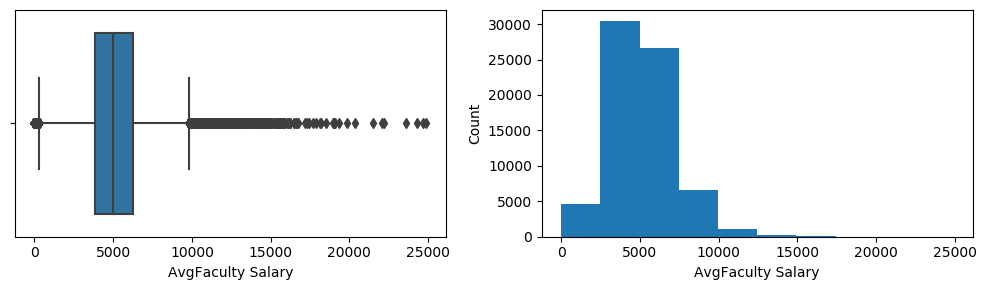

In [33]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('AvgFaculty Salary', data=data)

plt.subplot(1, 2, 2)
plt.hist(data['AvgFaculty Salary'])
plt.xlabel('AvgFaculty Salary')
plt.ylabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

Given the wide distribution of these values, it might be worth putting them into bins.

It will be interesting to see how faculty salary varies by school type, size, and tuition revenue.

### Percent fulltime faculty
The next column is the percentage of faculty that are fulltime faculty. The value should be between 0 and 1.

In [34]:
print('Null count: ', data['Percent Fulltime Faculty'].isnull().sum())
zero = data.loc[data['Percent Fulltime Faculty']==0]
print('Schools with 0 Percent Fulltime Faculty', zero.shape[1])

data['Percent Fulltime Faculty'].describe()

Null count:  63747
Schools with 0 Percent Fulltime Faculty 32


count    60950.000000
mean         0.586062
std          0.299840
min          0.000000
25%          0.326500
50%          0.565250
75%          0.882400
max          1.166700
Name: Percent Fulltime Faculty, dtype: float64

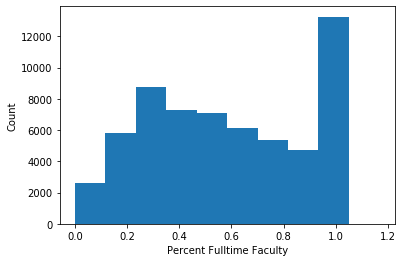

In [35]:
plt.hist(data['Percent Fulltime Faculty'])
plt.xlabel('Percent Fulltime Faculty')
plt.ylabel('Count')
plt.show()

The max value for this column is 1.16. Since the value is a percent, it doesn't make sense for a school to be able to have more than 100% fulltime faculty.

Only two schools (see below) have more than 100% full time faculty. (It seems reasonable to replace the values with 1, since a value of more than one doesn't make sense.) 

In [36]:
more_faculty = data.loc[data['Percent Fulltime Faculty']>1]
data.loc[more_faculty.index, 'Percent Fulltime Faculty'] = 1
more_faculty.head()

,Id,OPEID,Name,City,Zip,NumBranches,Primary degree type,High degree,Control,StateCode,...,PercentAidedLowIncome,PercentIndependent,PercentDependentLowIncome,PercentIndepentdentLowIncome,PercentFirstGen,AvgIncomeDependent,AvgIncomeIndep,MedianDebt,MedianDebtCompleters,MedianDebtNotComplete
40313,40314,01077900,porter and chester institute,STRATFORD,06615-7158,5,Predominantly certificate-degree granting,Certificate degree,Private for-profit,Connecticut,...,0.558626,0.597990,0.316667,0.721289,0.602041,71952.66983,31511.64518,7675.0,9700.0,3023.0
47675,47676,02337200,pj's college of cosmetology,BOWLING GREEN,42101,5,Predominantly certificate-degree granting,Certificate degree,Private for-profit,Kentucky,...,NaN,0.783972,0.451613,0.760000,0.648760,57244.45399,25578.47380,6625.0,7715.5,3363.0


### Proportion of students who complete a degree
The next column is shows the proportion of undergraduate students who completed their degree within 150% of the normal time at institutions that offer primarily certificate and associate's degree programs. These types of programs typically take less than 4 years to complete. (The analogous column for 4-year institutions was deleted due to a high number of missing values - it might be worth looking at that column again, and seeing these two columns could be combined into one.) 

In [37]:
print('Null count: ', data['Completion<4yr'].isnull().sum())
zero = data.loc[data['Completion<4yr']==0]
print('Schools with 0 Completion < 4yr', zero.shape[1])

data['Completion<4yr'].describe()

Null count:  63229
Schools with 0 Completion < 4yr 32


count    61468.000000
mean         0.545545
std          0.274390
min          0.000000
25%          0.302500
50%          0.585300
75%          0.766525
max          1.000000
Name: Completion<4yr, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


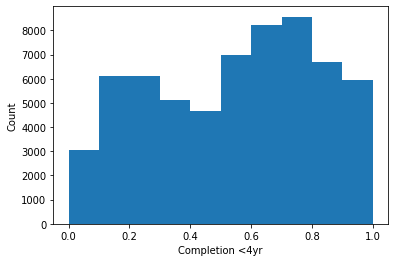

In [38]:
plt.hist(data['Completion<4yr'])
plt.xlabel('Completion <4yr')
plt.ylabel('Count')
plt.show()

Roughly half of the 'less than 4 year' institutions have more than half of their students who complete their programs withn 150% of the expected time.

### Percent completed, withdrawn and enrolled at the original institutions within 4 years

The next three columns show the percentage of students who start, finish or withdraw from the original institution within 4 years.

It is not clear whether these columns contain data from all schools, or just from 4 year institutions. I suspect that they include data from all schools.

In [39]:
print('Null count, % completed: ', data['PercentCompleted4yr'].isnull().sum())
zero = data.loc[data['PercentCompleted4yr']==0]
print('Schools with 0 PercentCompleted4yr', zero.shape[1])

print('Null count, % completed: ', data['PercentWithdraw4yr'].isnull().sum())
zero = data.loc[data['PercentWithdraw4yr']==0]
print('Schools with 0 PercentWithdraw4yr', zero.shape[1])

print('Null count, % completed: ', data['PercentEnrolled4yr'].isnull().sum())
zero = data.loc[data['PercentEnrolled4yr']==0]
print('Schools with 0 PercentEnrolled4yr', zero.shape[1])

data[['PercentCompleted4yr', 'PercentWithdraw4yr', 'PercentEnrolled4yr']].describe()

Null count, % completed:  53456
Schools with 0 PercentCompleted4yr 32
Null count, % completed:  54470
Schools with 0 PercentWithdraw4yr 32
Null count, % completed:  62255
Schools with 0 PercentEnrolled4yr 32


,PercentCompleted4yr,PercentWithdraw4yr,PercentEnrolled4yr
count,71241.000000,70227.000000,62442.000000
mean,0.370823,0.209453,0.041563
std,0.245872,0.147123,0.052636
min,0.000000,0.000000,0.000000
25%,0.149351,0.102837,0.000000
50%,0.371429,0.199797,0.025943
75%,0.571429,0.301848,0.068503
max,1.000000,0.860437,0.779661


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


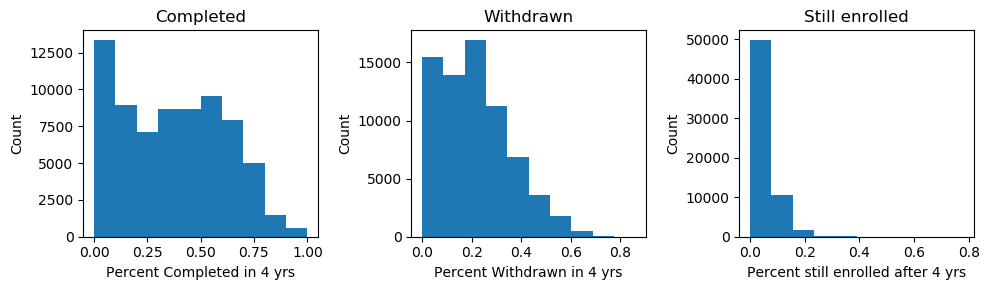

In [40]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.hist(data['PercentCompleted4yr'])
plt.xlabel('Percent Completed in 4 yrs')
plt.ylabel('Count')
plt.title('Completed')

plt.subplot(1, 3, 2)
plt.hist(data['PercentWithdraw4yr'])
plt.xlabel('Percent Withdrawn in 4 yrs')
plt.ylabel('Count')
plt.title('Withdrawn')

plt.subplot(1, 3, 3)
plt.hist(data['PercentEnrolled4yr'])
plt.xlabel('Percent still enrolled after 4 yrs')
plt.ylabel('Count')
plt.title('Still enrolled')
plt.tight_layout()
plt.show()

Comments - 

### Other student characteristics

In [41]:
print('Null count - %>25:', data['PercentAge>25'].isnull().sum())
zero = data.loc[data['PercentAge>25']==0]
print('Schools with 0 PercentAge>25', zero.shape[1])

print('Null count- %AidedLowIncome: ', data['PercentAidedLowIncome'].isnull().sum())
zero = data.loc[data['PercentAidedLowIncome']==0]
print('Schools with 0 PercentAidedLowIncome', zero.shape[1])

print('Null count - %FirstGeneration: ', data['PercentFirstGen'].isnull().sum())
zero = data.loc[data['PercentFirstGen']==0]
print('Schools with 0 PercentFirstGen', zero.shape[1])

data[['PercentAge>25','PercentAidedLowIncome', 'PercentFirstGen']].describe().T

Null count - %>25: 72108
Schools with 0 PercentAge>25 32
Null count- %AidedLowIncome:  61213
Schools with 0 PercentAidedLowIncome 32
Null count - %FirstGeneration:  21887
Schools with 0 PercentFirstGen 32


,count,mean,std,min,25%,50%,75%,max
PercentAge>25,52589.0,0.405559,0.219877,0.0,0.243200,0.403100,0.554500,1.0
PercentAidedLowIncome,63484.0,0.653937,0.194975,0.0,0.526316,0.688997,0.804468,1.0
PercentFirstGen,102810.0,0.496133,0.135729,0.0,0.415525,0.511708,0.583333,1.0


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


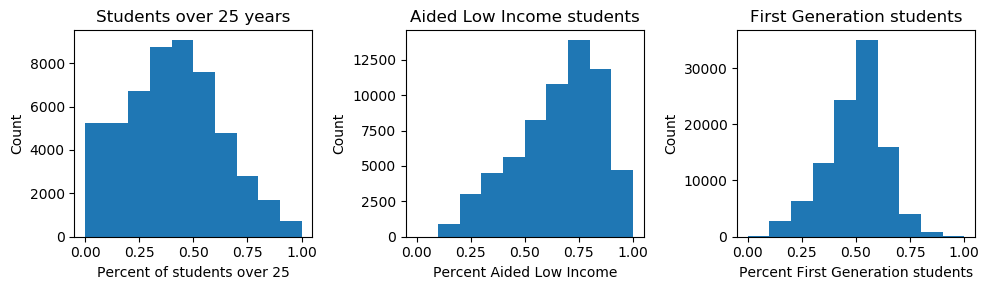

In [42]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.hist(data['PercentAge>25'])
plt.xlabel('Percent of students over 25')
plt.ylabel('Count')
plt.title('Students over 25 years')

plt.subplot(1, 3, 2)
plt.hist(data['PercentAidedLowIncome'])
plt.xlabel('Percent Aided Low Income')
plt.ylabel('Count')
plt.title('Aided Low Income students')

plt.subplot(1, 3, 3)
plt.hist(data['PercentFirstGen'])
plt.xlabel('Percent First Generation students')
plt.ylabel('Count')
plt.title('First Generation students')
plt.tight_layout()
plt.show()

In [43]:
print('Null count - % Independent: ', data['PercentIndependent'].isnull().sum())
zero = data.loc[data['PercentIndependent']==0]
print('Schools with 0 PercentIndependent', zero.shape[1])

print('Null count - % Independent LowIncome: ', data['PercentIndepentdentLowIncome'].isnull().sum())
zero = data.loc[data['PercentIndepentdentLowIncome']==0]
print('Schools with 0 PercentIndepentdentLowIncome', zero.shape[1])

print('Null count - Avg Income Independent: ', data['AvgIncomeIndep'].isnull().sum())
zero = data.loc[data['AvgIncomeIndep']==0]
print('Schools with 0 AvgIncomeIndep', zero.shape[1])

print('Null count - % Dependent LowIncome: ', data['PercentDependentLowIncome'].isnull().sum())
zero = data.loc[data['PercentDependentLowIncome']==0]
print('Schools with 0 PercentDependentLowIncome', zero.shape[1])

print('Null count - Avg Income Dependent: ', data['AvgIncomeDependent'].isnull().sum())
zero = data.loc[data['AvgIncomeDependent']==0]
print('Schools with 0 AvgIncomeDependent', zero.shape[1])


data[['PercentIndependent', 'PercentIndepentdentLowIncome', 'AvgIncomeIndep',
      'PercentDependentLowIncome','AvgIncomeDependent']].describe().T

Null count - % Independent:  15552
Schools with 0 PercentIndependent 32
Null count - % Independent LowIncome:  42514
Schools with 0 PercentIndepentdentLowIncome 32
Null count - Avg Income Independent:  20110
Schools with 0 AvgIncomeIndep 32
Null count - % Dependent LowIncome:  42657
Schools with 0 PercentDependentLowIncome 32
Null count - Avg Income Dependent:  20592
Schools with 0 AvgIncomeDependent 32


,count,mean,std,min,25%,50%,75%,max
PercentIndependent,109145.0,0.562163,0.253411,0.000000,0.380282,0.611111,0.760891,1.0000
PercentIndepentdentLowIncome,82183.0,0.787203,0.116845,0.227034,0.732233,0.807712,0.868637,1.0000
AvgIncomeIndep,104587.0,22996.918424,9875.164288,0.000000,16418.056615,21541.188940,27586.208095,103946.4613
PercentDependentLowIncome,82040.0,0.487150,0.194155,0.000000,0.327445,0.483177,0.630393,1.0000
AvgIncomeDependent,104105.0,51699.970058,24105.839370,246.550640,32901.468090,48484.402690,67701.453360,189041.8019


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


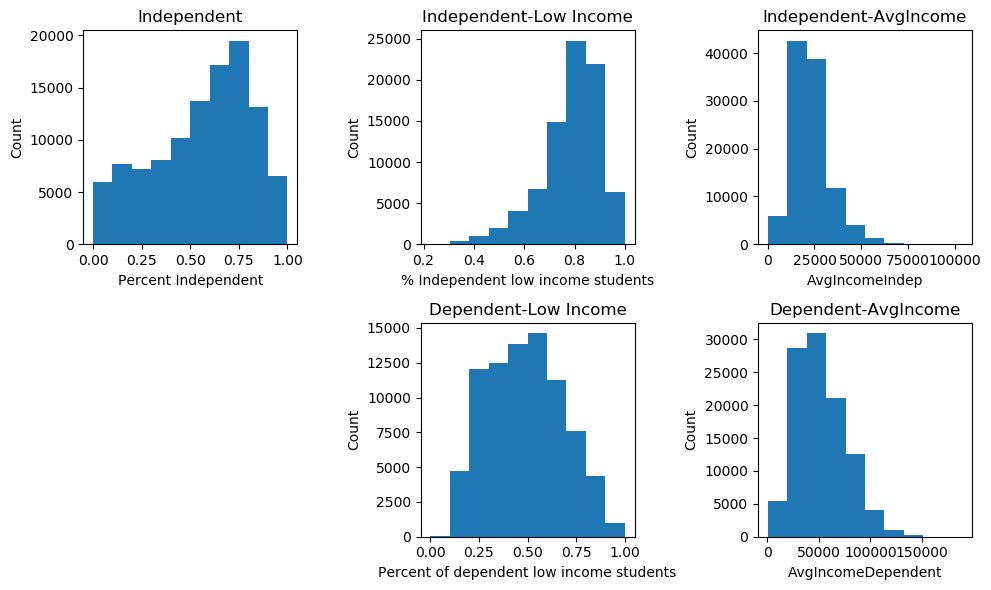

In [44]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(2, 3, 1)
# Percentage of students who are financially independent
plt.hist(data['PercentIndependent'])
plt.xlabel('Percent Independent')
plt.ylabel('Count')
plt.title('Independent')

plt.subplot(2, 3, 2)
# Percentage of students who are financially independent and have family incomes between $0-30,000
plt.hist(data['PercentIndepentdentLowIncome'])
plt.xlabel('% Independent low income students')
plt.ylabel('Count')
plt.title('Independent-Low Income')

plt.subplot(2, 3, 3)
plt.hist(data['AvgIncomeIndep'])
plt.xlabel('AvgIncomeIndep')
plt.ylabel('Count')
plt.title('Independent-AvgIncome')

plt.subplot(2, 3, 5)
# Percentage of students who are financially dependent and have family incomes between $0-30,000
plt.hist(data['PercentDependentLowIncome'])
plt.xlabel('Percent of dependent low income students')
plt.ylabel('Count')
plt.title('Dependent-Low Income')

plt.subplot(2, 3, 6)
plt.hist(data['AvgIncomeDependent'])
plt.xlabel('AvgIncomeDependent')
plt.ylabel('Count')
plt.title('Dependent-AvgIncome')
plt.tight_layout()
plt.show()

### Student debt

In [45]:
print('Null count - Median debt:', data['MedianDebt'].isnull().sum())
zero = data.loc[data['MedianDebt']==0]
print('Schools with 0 MedianDebt', zero.shape[1])

print('Null count - Median debt, completers: ', data[ 'MedianDebtCompleters'].isnull().sum())
zero = data.loc[data['MedianDebtCompleters' ]==0]
print('Schools with 0 MedianDebtCompleters', zero.shape[1])

print('Null count - Median debt, not complete: ', data['MedianDebtNotComplete'].isnull().sum())
zero = data.loc[data[ 'MedianDebtNotComplete']==0]
print('Schools with 0 MedianDebtNotComplete', zero.shape[1])

data[['MedianDebt','MedianDebtCompleters','MedianDebtNotComplete']].describe().T

Null count - Median debt: 29830
Schools with 0 MedianDebt 32
Null count - Median debt, completers:  36874
Schools with 0 MedianDebtCompleters 32
Null count - Median debt, not complete:  36734
Schools with 0 MedianDebtNotComplete 32


,count,mean,std,min,25%,50%,75%,max
MedianDebt,94867.0,8917.916441,4952.591412,124.0,5250.0,7937.0,12000.0,131335.0
MedianDebtCompleters,87823.0,12368.730862,7217.114498,310.0,6625.0,10895.0,17125.0,53831.5
MedianDebtNotComplete,87963.0,6445.380751,3523.085343,383.0,3719.0,5500.0,8750.0,35125.0


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


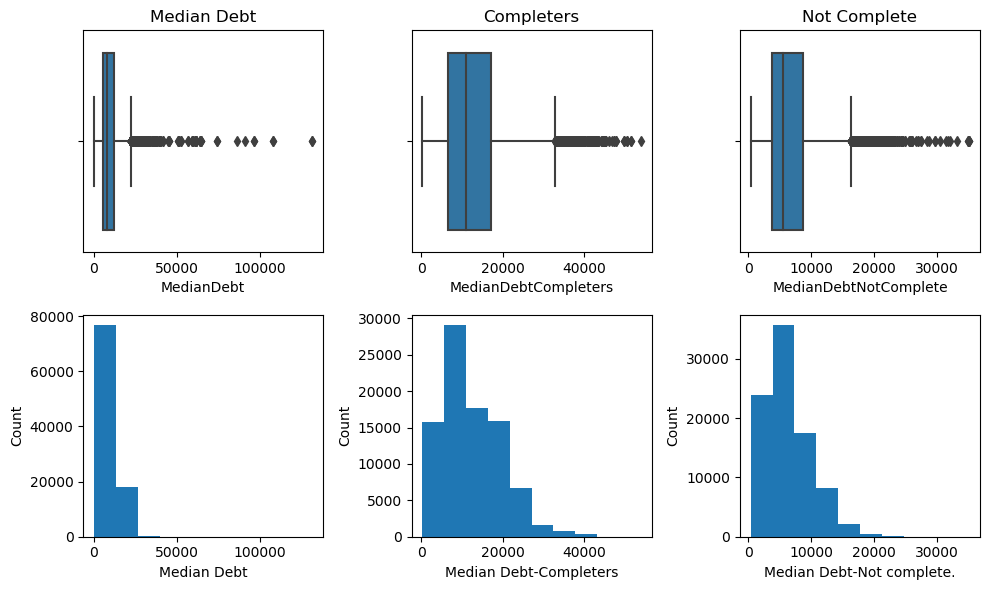

In [46]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(2, 3, 1)
sns.boxplot('MedianDebt', data=data)
plt.title('Median Debt')

plt.subplot(2, 3, 4)
plt.hist(data['MedianDebt'])
plt.xlabel('Median Debt')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.boxplot('MedianDebtCompleters', data=data)
plt.title('Completers')

plt.subplot(2, 3, 5)
plt.hist(data['MedianDebtCompleters'])
plt.xlabel('Median Debt-Completers')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
sns.boxplot('MedianDebtNotComplete', data=data)
plt.title('Not Complete')

plt.subplot(2, 3, 6)
plt.hist(data['MedianDebtNotComplete'])
plt.xlabel('Median Debt-Not complete.')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Explore CURROPER column
- How many schools are open vs closed?
- What percentage of schools are open vs closed?
- How does this relate to control?

In [47]:
# How many schools are closed?
num_open = data['CURROPER'].sum()
print('Open:  ', num_open)

closed = data.loc[data['CURROPER']==False]
print('Closed:  ', closed.shape[0])

Open:   101120
Closed:   23577


In [48]:
#How many schools are closed by OPEID?
closed.OPEID.value_counts()

02502700    18
02205203    18
01212804    18
02599801    18
02582900    18
            ..
00726800     1
00307602     1
00433500     1
00127700     1
03360300     1
Name: OPEID, Length: 3826, dtype: int64

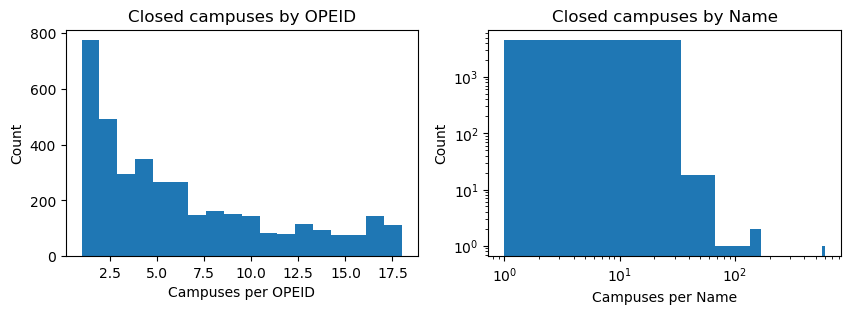

In [49]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.hist(closed.OPEID.value_counts(), bins=18)
plt.xlabel('Campuses per OPEID')
plt.ylabel('Count')
plt.title('Closed campuses by OPEID')

plt.subplot(1, 2, 2)
plt.hist(closed.Name.value_counts(), bins=18)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Campuses per Name')
plt.ylabel('Count')
plt.title('Closed campuses by Name')
plt.tight_layout
plt.show()

In [50]:
closed.Name.value_counts()

itt technical institute                                         599
empire beauty school                                            147
marinello school of beauty                                      137
lincoln technical institute                                     117
sanford-brown college                                            68
                                                               ... 
tad technical institute                                           1
aec texas institute-garland                                       1
marion community schools tucker career and technology center      1
academy of health careers                                         1
oregon city beauty school                                         1
Name: Name, Length: 4560, dtype: int64

ITT Technical Institute is the school name with the most number of campuses that are closed. This isn't surprising, since ITT Tech closed several years ago. ITT Tech also had the highest number of schools in the entire database.

In [51]:
closed.Control.value_counts()

Private for-profit    16329
Private nonprofit      4241
Public                 3006
Name: Control, dtype: int64

In [52]:
closed['Primary degree type'].value_counts()

Predominantly certificate-degree granting    14693
Predominantly associate's-degree granting     4019
Predominantly bachelor's-degree granting      2327
Not classified                                1750
Entirely graduate-degree granting              788
Name: Primary degree type, dtype: int64

In [53]:
closedControl = closed.pivot_table(index='Primary degree type', columns='Control', aggfunc='size')
closedControl

Control,Private for-profit,Private nonprofit,Public
Primary degree type,,,
Entirely graduate-degree granting,228,520,40
Not classified,1066,382,301
Predominantly associate's-degree granting,2843,601,575
Predominantly bachelor's-degree granting,831,1163,333
Predominantly certificate-degree granting,11361,1575,1757


Two-thirds of the closed schools are private for-profit schools. Over half of them were predominantly certificate degree granting institutions.

# Bivariate exploration

## College enrollment

How does college enrollment correlate with school type, tuition revenue, expenditure, and operating status?

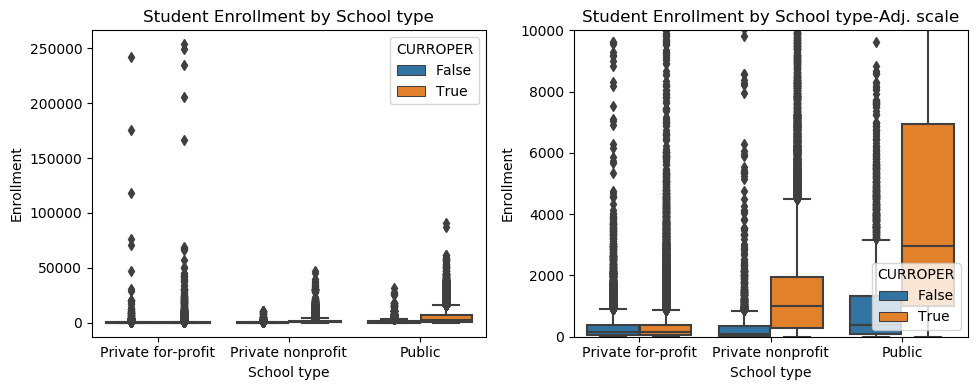

In [54]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Control', 'Enrollment-DegreeSeeking', data=data, hue = 'CURROPER')
plt.title('Student Enrollment by School type')
plt.xlabel('School type')
plt.ylabel('Enrollment')

plt.subplot(1, 2, 2)
sns.boxplot('Control', 'Enrollment-DegreeSeeking', data=data, hue = 'CURROPER')
plt.title('Student Enrollment by School type-Adj. scale')
plt.ylim((0,10000))
plt.xlabel('School type')
plt.ylabel('Enrollment')
plt.tight_layout()
plt.show()

The schools with the highest enrollment, in fact, the 8 schools with more than 100,000 students, are all private for-profit schools. Zooming in on the plot to include just schools with less than 10,000 students gives a more detailed view of the bulk of the data.

Private for-profit schools can have much higher enrollments than the other two types of schools. Interestingly, some of the closed for-profit schools have really high enrollments.

Currently operating public schools have the highest median enrollment.

Given the high number of values outside the IQR range for all three school types it seems like binning the values for enrollment would make sense. - How do I decide what range of bins to use?

For the time being, I am going to exclude schools with Enrollment over 100,000 from the analysis.

In [55]:
high_enrollment = data.loc[data['Enrollment-DegreeSeeking']>100000]
print(high_enrollment.Control.value_counts())
data.drop(high_enrollment.index, inplace=True)

Private for-profit    8
Public                0
Private nonprofit     0
Name: Control, dtype: int64


### Enrollment vs Tuition Revenue

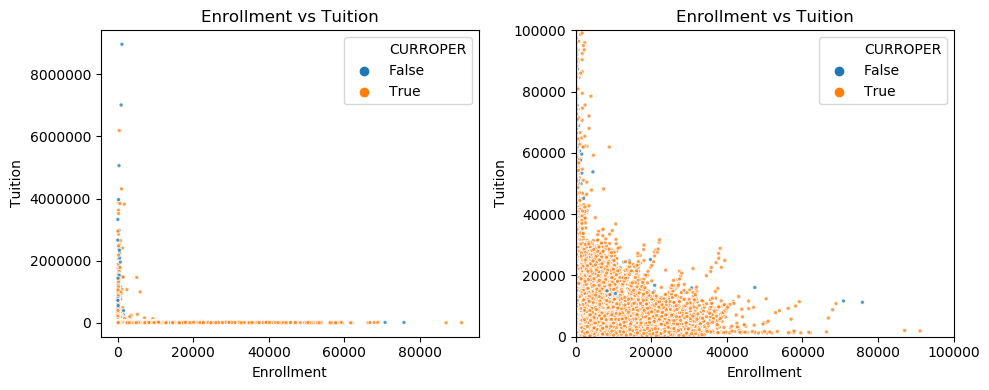

In [56]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Enrollment-DegreeSeeking', 'TuitionRevenue/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.title('Enrollment vs Tuition')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'TuitionRevenue/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Enrollment vs Tuition')
plt.tight_layout()
plt.show()

Even with the highest tuition school excluded earlier, there are still several schools with tuition revenue higher than 5 million. 11 schools have revenue more than 5 million, 6 of which are closed. Most of these schools are private for-profit schools, with a single public school and 3 private nonprofit schools.

In [57]:
fiveMilTuition = data.loc[data['TuitionRevenue/FTE']>5000000]
print('Currently Operating:')
print(fiveMilTuition.CURROPER.value_counts())

print('Control Type:')
print(fiveMilTuition.Control.value_counts())
#data.drop(fiveMilTuition.index, inplace=True)

Currently Operating:
False    6
True     5
Name: CURROPER, dtype: int64
Control Type:
Private for-profit    7
Private nonprofit     3
Public                1
Name: Control, dtype: int64


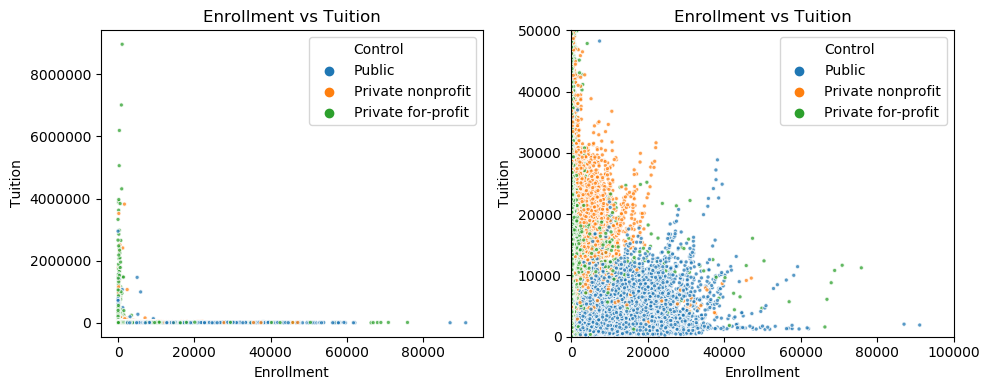

In [58]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Enrollment-DegreeSeeking', 'TuitionRevenue/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.title('Enrollment vs Tuition')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'TuitionRevenue/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.xlim(0, 100000)
plt.ylim(0, 50000)
plt.title('Enrollment vs Tuition')
plt.tight_layout()
plt.show()

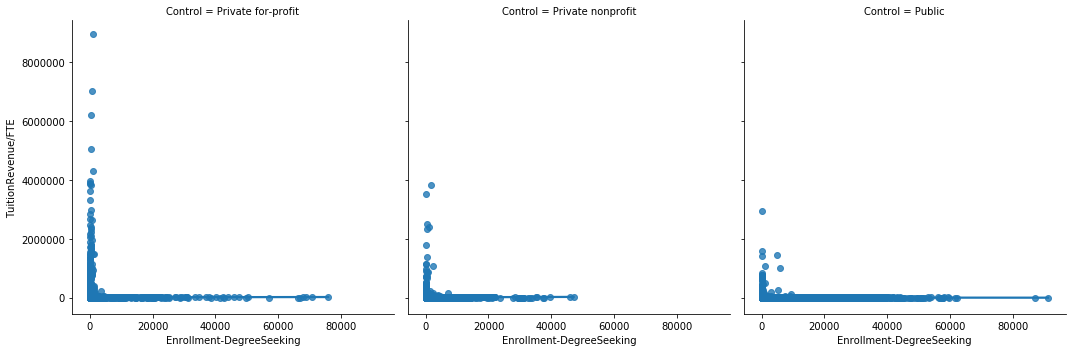

In [85]:
sns.lmplot( x='Enrollment-DegreeSeeking', y='TuitionRevenue/FTE', data=data , col='Control')

It appears that the schools with the highest enrollment AND lowest tuition are mostly public schools, and the schools with lowest enrollment and  highest tuition are private nonprofit schools, with several private for-profit schools mixed in.

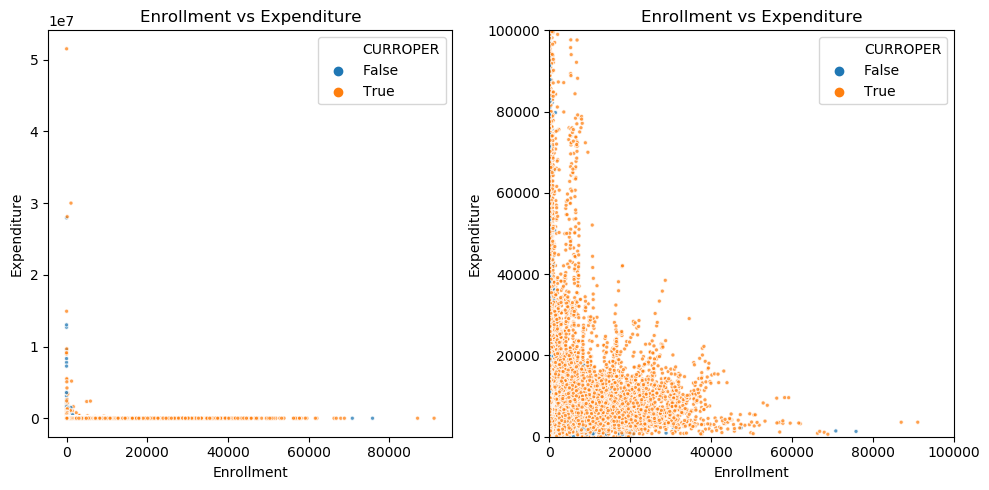

In [59]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Enrollment-DegreeSeeking', 'Expenditure/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.title('Enrollment vs Expenditure')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'Expenditure/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Enrollment vs Expenditure')
plt.tight_layout()
plt.show()

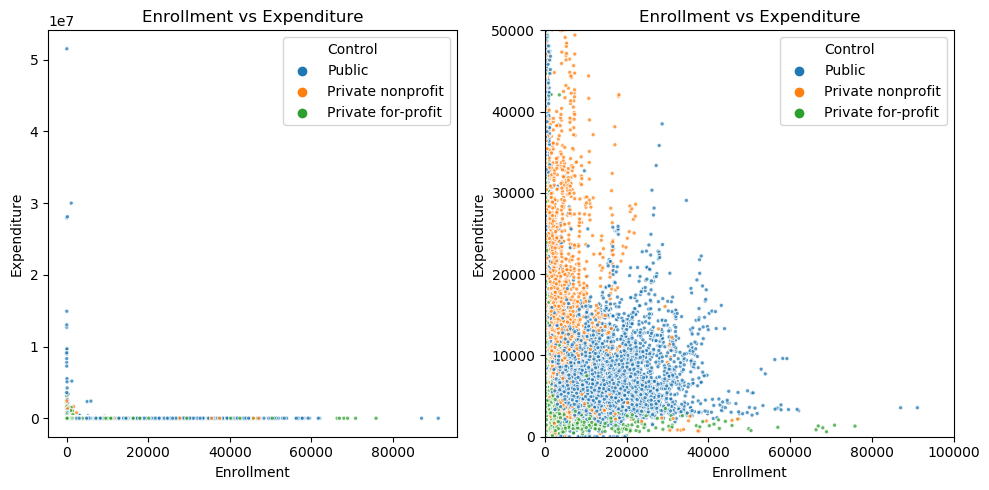

In [60]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Enrollment-DegreeSeeking', 'Expenditure/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.title('Enrollment vs Expenditure')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'Expenditure/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 50000)
plt.title('Enrollment vs Expenditure')
plt.tight_layout()
plt.show()

(0, 100000)

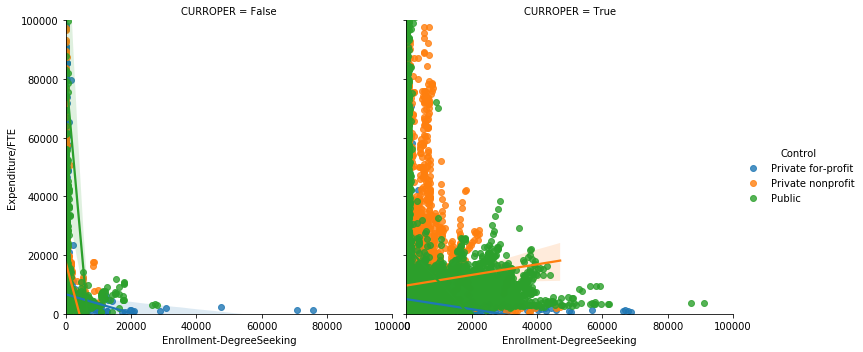

In [99]:
sns.lmplot( x='Enrollment-DegreeSeeking', y='Expenditure/FTE', data=data , hue='Control', col='CURROPER')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
#plt.ylim(0, 2000000)

Private for-profit schools generally have the lowest expenditure, regardless of enrollment, while private nonprofit schools have gnerally higher expenditures and lower enrollments. Levels of expenditure and school control type are explored more below.

### Tuition and Expenditure
How does tuition revenue correlate with expenditure, school type and operating status?

In [61]:
data['TuitionRevenue/FTE'].groupby(data['Control']).mean()

Control
Private for-profit    18064.836215
Private nonprofit     14637.844756
Public                 5267.275071
Name: TuitionRevenue/FTE, dtype: float64

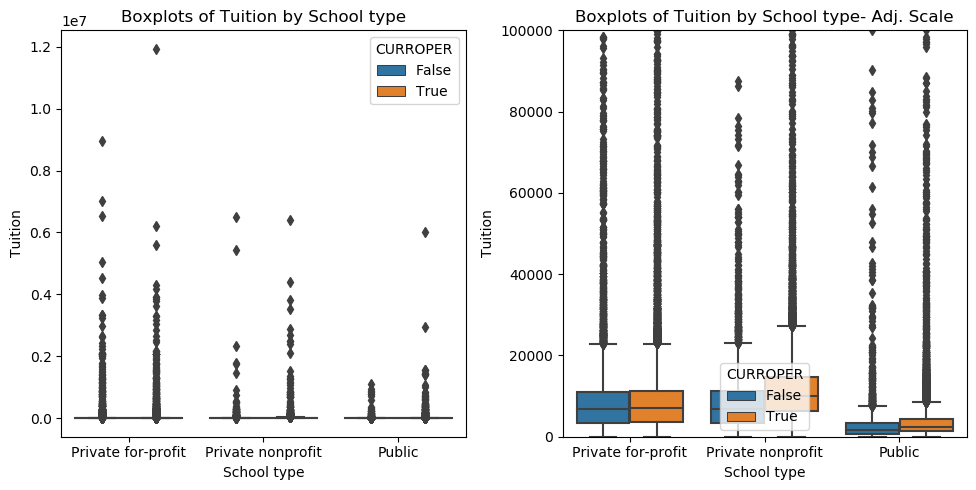

In [62]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Control', 'TuitionRevenue/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition by School type')
plt.ylabel('Tuition')
plt.xlabel('School type')

plt.subplot(1, 2, 2)
sns.boxplot('Control', 'TuitionRevenue/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition by School type- Adj. Scale')
plt.ylim(0, 100000)
plt.ylabel('Tuition')
plt.xlabel('School type')
plt.tight_layout()
plt.show()

Public schools have the lowest mean tuition, while private for profit schools have the highest mean tuition, and private non-profit schools have the highest median tuition.

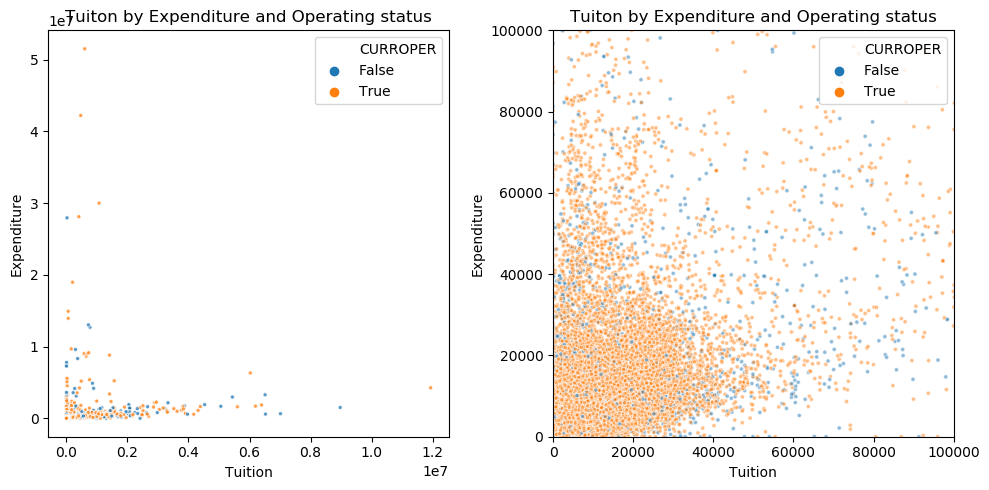

In [63]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TuitionRevenue/FTE', 'Expenditure/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.title('Tuiton by Expenditure and Operating status')

plt.subplot(1, 2, 2)
sns.scatterplot('TuitionRevenue/FTE', 'Expenditure/FTE', data=data, hue='CURROPER', marker='.', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and Operating status')
plt.tight_layout()
plt.show()

I thought that perhaps tuition and expenditure would correlate - especially for the schools with the highest tuition and the highest expenditure. While there may be a correlation between tuition and expenditure in general, the schools with the highest expenditure are not the schools with the highest tuition, and vice versa.

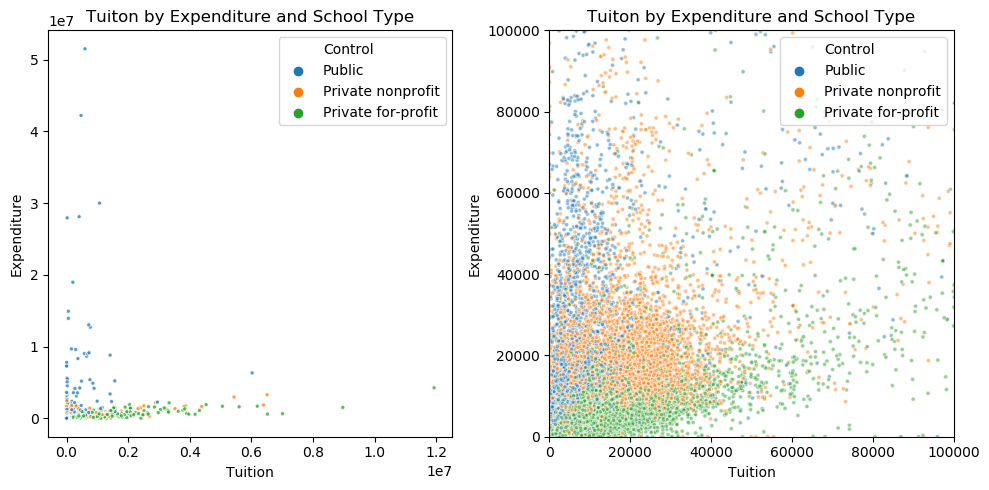

In [64]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TuitionRevenue/FTE', 'Expenditure/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.title('Tuiton by Expenditure and School Type')

plt.subplot(1, 2, 2)
sns.scatterplot('TuitionRevenue/FTE', 'Expenditure/FTE', data=data, hue='Control', marker='.', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and School Type')
plt.tight_layout()
plt.show()

(0, 5000000)

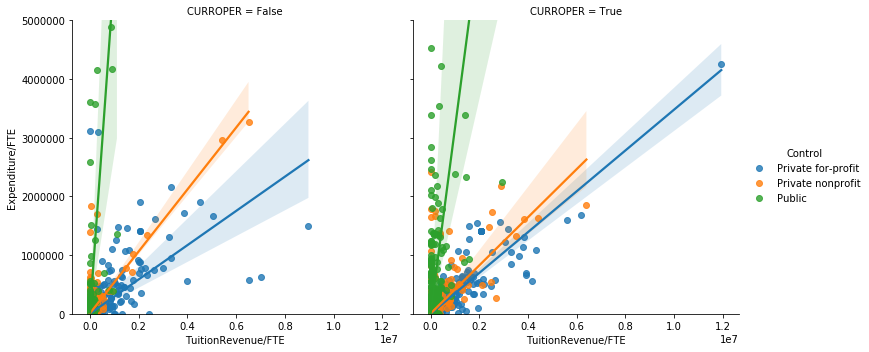

In [94]:
sns.lmplot( x='TuitionRevenue/FTE', y='Expenditure/FTE', data=data , hue='Control', col = 'CURROPER')
plt.ylim(0, 5000000)

In [65]:
data['Expenditure/FTE'].groupby(data['Control']).mean()

Control
Private for-profit     7449.102072
Private nonprofit     12119.687074
Public                23952.878380
Name: Expenditure/FTE, dtype: float64

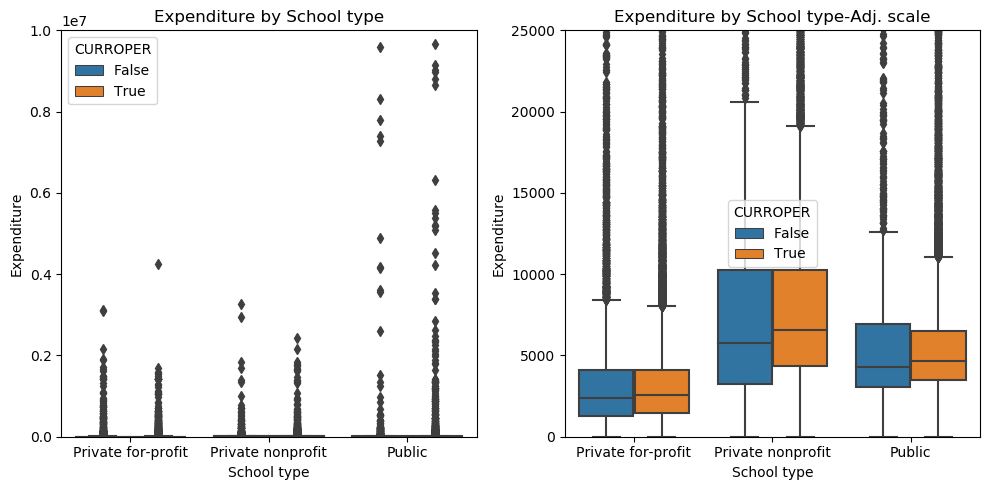

In [66]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Control', 'Expenditure/FTE', data=data, hue = 'CURROPER')
plt.title('Expenditure by School type')
plt.ylabel('Expenditure')
plt.xlabel('School type')
plt.ylim(0, 10000000)

plt.subplot(1, 2, 2)
sns.boxplot('Control', 'Expenditure/FTE', data=data, hue = 'CURROPER')
plt.title('Expenditure by School type-Adj. scale')
plt.ylabel('Expenditure')
plt.xlabel('School type')
plt.ylim((0,25000))
plt.tight_layout()
plt.show()

Public schools have the highest mean expenditures, and more public schools with really high expenditure levels, but the median private nonprofit school spends more on students than the other two types of schools. Private for-profit schools have the lowest expenditure levels.

## Median debt amounts

How does median debt relate to enrollment and control?

In [67]:
data.MedianDebt.groupby(data.Control).mean()

Control
Private for-profit     7589.899560
Private nonprofit     12475.718016
Public                 7574.363230
Name: MedianDebt, dtype: float64

In [68]:
maxDebtDF = data.loc[data.MedianDebt > 50000]
maxDebtDF.shape

(36, 32)

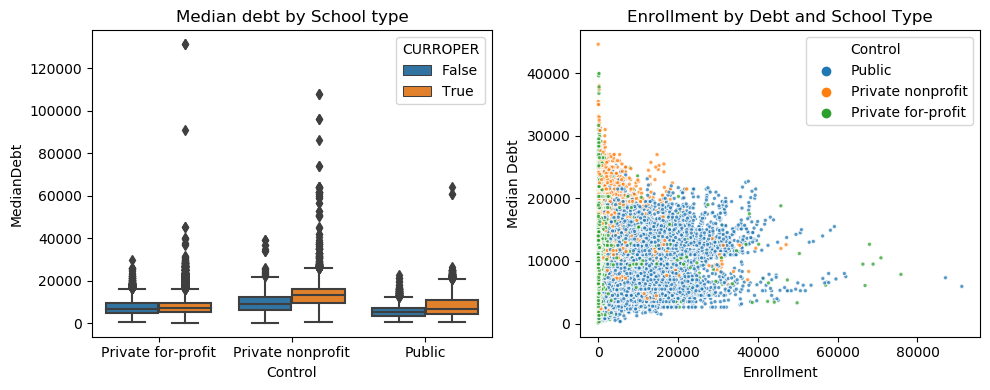

In [69]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Control', 'MedianDebt', data=data, hue = 'CURROPER')
plt.title('Median debt by School type')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'MedianDebt', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Median Debt')
plt.title('Enrollment by Debt and School Type')
plt.tight_layout()
plt.show()

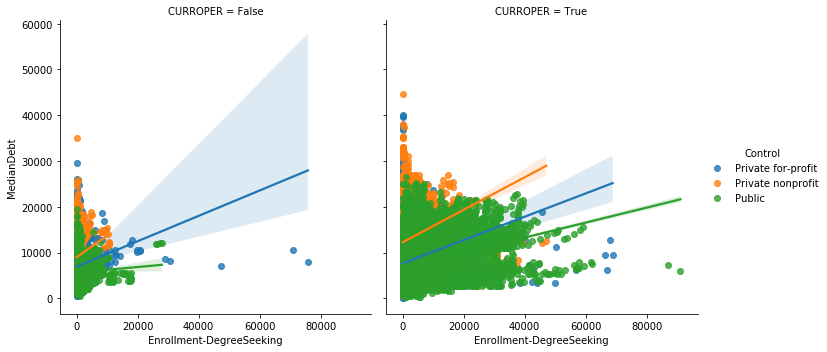

In [90]:
sns.lmplot( x='Enrollment-DegreeSeeking', y='MedianDebt', data=data , hue='Control', col='CURROPER')

### Other student body characteristics

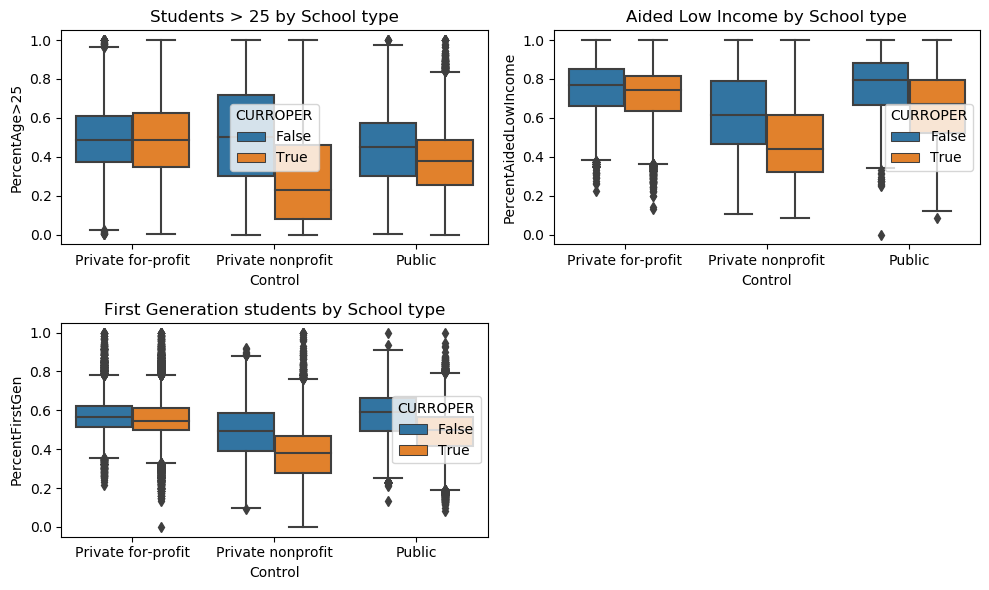

In [70]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
sns.boxplot('Control', 'PercentAge>25', data=data, hue = 'CURROPER')
plt.title('Students > 25 by School type')

plt.subplot(2, 2, 2)
sns.boxplot('Control', 'PercentAidedLowIncome', data=data, hue = 'CURROPER')
plt.title('Aided Low Income by School type')

plt.subplot(2, 2, 3)
sns.boxplot('Control', 'PercentFirstGen', data=data, hue = 'CURROPER')
plt.title('First Generation students by School type')
plt.tight_layout()
plt.show()

### Completion, Withdrawn, Still enrolled
The first tables show the means for just the closed schools. The boxplots show the entire dataset.

In [79]:
closed.PercentCompleted4yr.groupby(closed.Control).mean()

Control
Private for-profit    0.444281
Private nonprofit     0.333790
Public                0.177001
Name: PercentCompleted4yr, dtype: float64

In [80]:
closed.PercentWithdraw4yr.groupby(closed.Control).mean()

Control
Private for-profit    0.246666
Private nonprofit     0.181481
Public                0.122700
Name: PercentWithdraw4yr, dtype: float64

In [81]:
closed.PercentEnrolled4yr.groupby(closed.Control).mean()

Control
Private for-profit    0.015779
Private nonprofit     0.024623
Public                0.052875
Name: PercentEnrolled4yr, dtype: float64

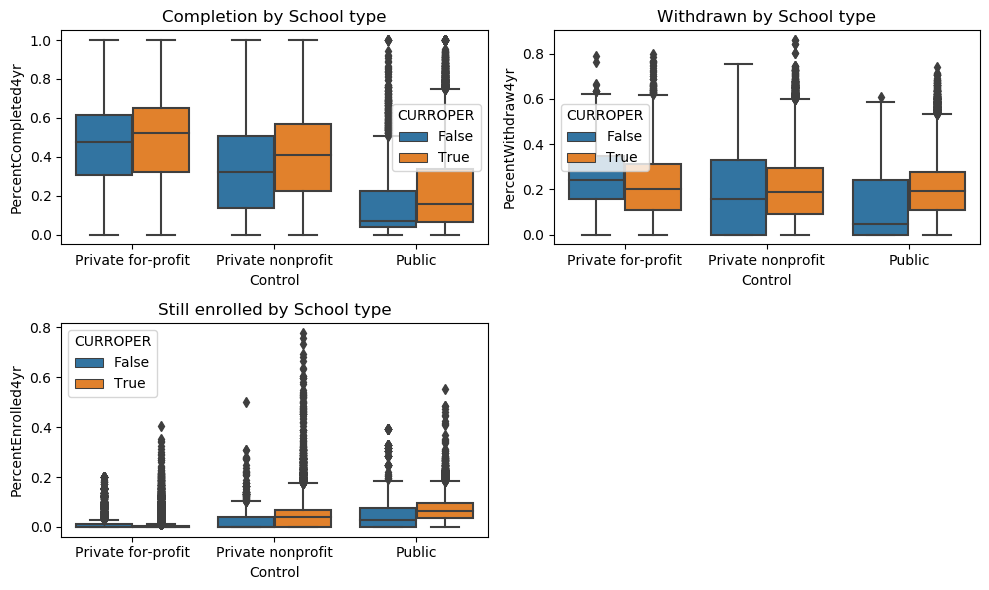

In [77]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
sns.boxplot('Control', 'PercentCompleted4yr', data=data, hue = 'CURROPER')
plt.title('Completion by School type')

plt.subplot(2, 2, 2)
sns.boxplot('Control', 'PercentWithdraw4yr', data=data, hue = 'CURROPER')
plt.title('Withdrawn by School type')

plt.subplot(2, 2, 3)
sns.boxplot('Control', 'PercentEnrolled4yr', data=data, hue = 'CURROPER')
plt.title('Still enrolled by School type')
plt.tight_layout()
plt.show()

(0, 1)

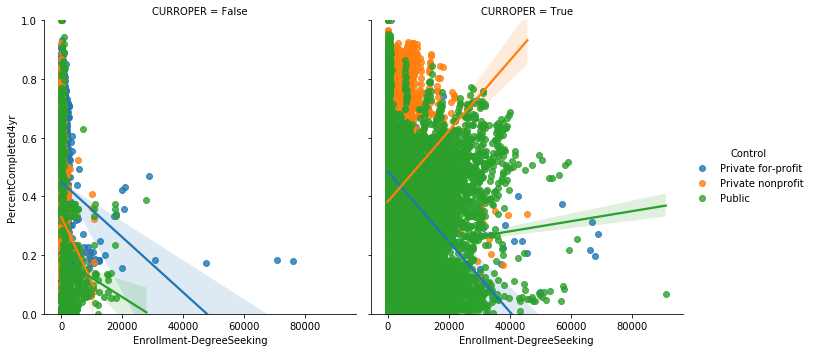

In [103]:
sns.lmplot( x='Enrollment-DegreeSeeking', y='PercentCompleted4yr', data=data , hue='Control', col='CURROPER')
plt.ylim(0, 1)

(0, 1)

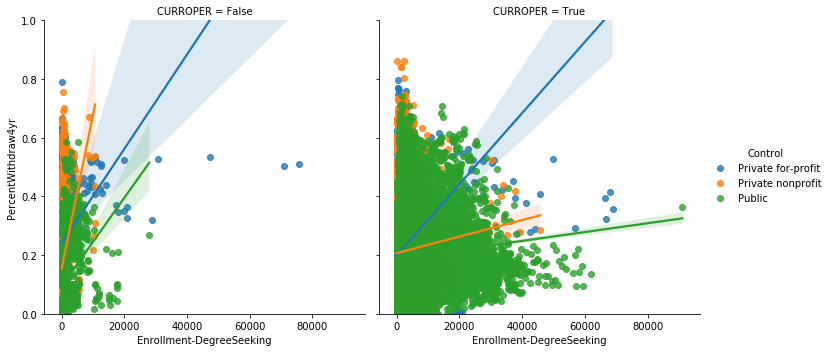

In [104]:
sns.lmplot( x='Enrollment-DegreeSeeking', y='PercentWithdraw4yr', data=data , hue='Control', col='CURROPER')
plt.ylim(0, 1)

(0, 1)

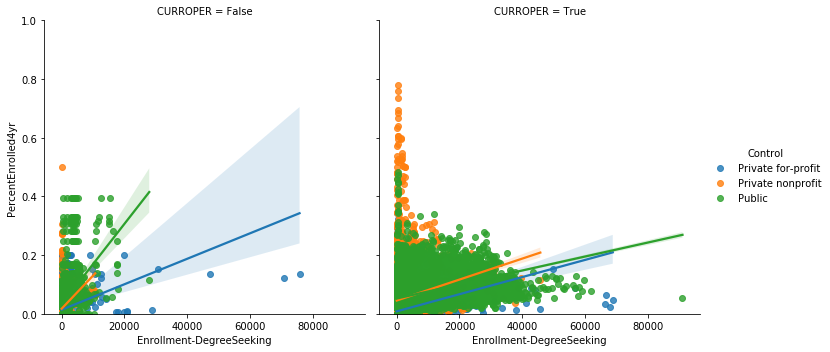

In [105]:
sns.lmplot( x='Enrollment-DegreeSeeking', y='PercentEnrolled4yr', data=data , hue='Control', col='CURROPER')
plt.ylim(0, 1)

### Inferential Statistics Hint: 
Do any particular results in your data strike you as [abnormal]? What hypotheses can you form (Null and Alternative hypotheses) which you could go on to test? Take some time to recall your statistical concepts, such as that the [p-value] of an observation is the probability of seeing data at least as extreme as that observation, on the assumption of the null hypothesis.

## Explore data relationships

### Data Visualization Hint: 
Recall your [matplotlib] and [seaborn] functions for data visualization: 
Matplotlib:
- plt.plot()
- plt.xlabel() 
- plt.show() 
- plt.hist(),
Seaborn:
- sns.relplot() 
- sns.lmplot() 
- sns.catplot().

# Feature Selection and Engineering Hint: 
Feature selection is where data storytelling starts: we tell a story as soon as we include certain features and omit others. But how we manipulate - or engineer - those fields is just as important. Recall the crucial elements to feature engineering:
- If you have categorical features, you might need to [one-hot encode] them
- You may need to [binarize] your columns and [bin] your values.
- To handle missing data, think about how appropriate the methods of [listwise
deletion, data imputation, replacing missing values with constants] or simply attempting to [find the missing values] are for your data.
- Think about whether you need to [standardize, log-transform or normalize] your data, as well as statistically valid ways to remove outliers.

# Questions to answer
Are there variables that are particularly significant in terms of explaining the answer to your project question?
● Are there significant differences between subgroups in your data that may be relevant to your project aim?
● Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
● What are the most appropriate tests to use to analyze these relationships?